# ENSAI3A - Privacy-Preserving Data Publishing

## Lab session : Partition-Based Models and Algorithms

The well-known parisien health center \emph{Brascassés} wants to share his patients' health data with epidemiologists. Before starting sharing data, the DBA of Brascassés would like to ask to an expert his opinion on the privacy guarantees of the sanitization methods used. You are the expert.

The original dataset (file './csv-patients/Jeu de donnees-Tableau 1.csv') is a table with three columns and 21 tuples. Each tuple corresponds to a different patient. The DBA has set the QI to (Age, Code postal) and the SD to Diagnostic. Based on his home-made Mondrian implementation, he has also computed four possible sanitized releases of the dataset (files './csv-patients/Partitionnement P$_i$-Tableau 1.csv', and denoted G$_i$ below). All are candidates to being published. 

**Your goal is to understand the privacy guarantees of the releases and to give your opinion on their possible publication.**

You can work with your pencil and paper, or with a PDF modifier (the figures are all given in PDF format), or with Python. We obviously recommand the latest option and prepared the Notebook below for helping you. 

### Imports and settings

In [1]:
from itertools import chain, combinations
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_colwidth', 0)

### Load data

In [2]:
def to_interval(x):
    """
    Utility function for creating panda intervals from the intervals stored in the CSV files.
    """
    return pd.Interval(*map(int, x.strip('[]').split(', ')), closed='both')

# The original dataset. 
d = pd.read_csv('./csv-patients/Jeu de donnees-Tableau 1.csv', sep=';', usecols=[1,2,3], 
                header=None, skiprows=1, names=['postcode', 'age', 'diagnostic'])

# The pair of columns that form the quasi-identifier specified by the DBA. 
qi = ['postcode', 'age']

# The column that form the sensitive data.
sd = ['diagnostic']

def read_partition(fn):
    """
    Utility function for reading a k-anonymous release stored in a CSV file. 
    """
    g = pd.read_csv(fn, sep='\t', header=None, skiprows=1, names=['postcode', 'age'], 
                    converters={'postcode': to_interval, 'age': to_interval})
    g['diagnostic'] = d.diagnostic
    return g

# Read the four releases from their corresponding files. 
g1 = read_partition('./csv-patients/Partitionnement P1-Tableau 1.csv')
g2 = read_partition('./csv-patients/Partitionnement P2-Tableau 1.csv')
g3 = read_partition('./csv-patients/Partitionnement P3-Tableau 1.csv')
g4 = read_partition('./csv-patients/Partitionnement P4-Tableau 1.csv')

In [3]:
# Plot the original dataset
d

postcode  age                  diagnostic
0   75010     22   Angine rouge              
1   75001     36   Grippe                    
2   75007     35   Angine blanche            
3   75003     24   Grippe                    
4   75008     24   Rhinopharyngite           
5   75002     35   Grippe                    
6   75001     32   Rhinopharyngite           
7   75003     37   Oblomovisme               
8   75001     38   Angine                    
9   75004     23   Grippe                    
10  75005     25   Grippe                    
11  75008     34   Angine blanche            
12  75003     23   Grippe                    
13  75006     24   Rhinopharyngite           
14  75009     30   Angine blanche            
15  75008     32   Angine                    
16  75006     31   Angine érythémateuse      
17  75004     28   Rhinopharyngite           
18  75004     34   Rhinopharyngite           
19  75001     20   Grippe                    
20  75007     38   Angine érythémato-pultacée

### Questions

<h4>1. Observe: for each release, what are the equivalence classes ? You might find it useful to give a name to each class (e.g., EC$_j$).</h4>

In [4]:
# There are 2 equivalence classes in G1, People whose postcode in [75001,75004] or [75005,75010]
display(g1)
# There are 4 equivalence classes in G2. People in ([75001,75004],[20,30]),([75005,75010],[20,30]) ,([75001,75004],[31,40]) & ([75005,75010],[31,40])
display(g2)
# There are 8 clasees in G3 & G4, which are too large for all to display here but we could distinguish them in the fllowing picture
display(g3)
display(g4) 

postcode       age                  diagnostic
0   [75005, 75010]  [20, 40]  Angine rouge              
1   [75001, 75004]  [20, 40]  Grippe                    
2   [75005, 75010]  [20, 40]  Angine blanche            
3   [75001, 75004]  [20, 40]  Grippe                    
4   [75005, 75010]  [20, 40]  Rhinopharyngite           
5   [75001, 75004]  [20, 40]  Grippe                    
6   [75001, 75004]  [20, 40]  Rhinopharyngite           
7   [75001, 75004]  [20, 40]  Oblomovisme               
8   [75001, 75004]  [20, 40]  Angine                    
9   [75001, 75004]  [20, 40]  Grippe                    
10  [75005, 75010]  [20, 40]  Grippe                    
11  [75005, 75010]  [20, 40]  Angine blanche            
12  [75001, 75004]  [20, 40]  Grippe                    
13  [75005, 75010]  [20, 40]  Rhinopharyngite           
14  [75005, 75010]  [20, 40]  Angine blanche            
15  [75005, 75010]  [20, 40]  Angine                    
16  [75005, 75010]  [20, 40]  Angine érythémateuse      
17  [75001, 75004]  [20, 40]  Rhinopharyngite           
18  [75001, 75004]  [20, 40]  Rhinopharyngite           
19  [75001, 75004]  [20, 40]  Grippe                    
20  [75005, 75010]  [20, 40]  Angine érythémato-pultacée

postcode       age                  diagnostic
0   [75005, 75010]  [20, 30]  Angine rouge              
1   [75001, 75004]  [31, 40]  Grippe                    
2   [75005, 75010]  [31, 40]  Angine blanche            
3   [75001, 75004]  [20, 30]  Grippe                    
4   [75005, 75010]  [20, 30]  Rhinopharyngite           
5   [75001, 75004]  [31, 40]  Grippe                    
6   [75001, 75004]  [31, 40]  Rhinopharyngite           
7   [75001, 75004]  [31, 40]  Oblomovisme               
8   [75001, 75004]  [31, 40]  Angine                    
9   [75001, 75004]  [20, 30]  Grippe                    
10  [75005, 75010]  [20, 30]  Grippe                    
11  [75005, 75010]  [31, 40]  Angine blanche            
12  [75001, 75004]  [20, 30]  Grippe                    
13  [75005, 75010]  [20, 30]  Rhinopharyngite           
14  [75005, 75010]  [20, 30]  Angine blanche            
15  [75005, 75010]  [31, 40]  Angine                    
16  [75005, 75010]  [31, 40]  Angine érythémateuse      
17  [75001, 75004]  [20, 30]  Rhinopharyngite           
18  [75001, 75004]  [31, 40]  Rhinopharyngite           
19  [75001, 75004]  [20, 30]  Grippe                    
20  [75005, 75010]  [31, 40]  Angine érythémato-pultacée

postcode       age                  diagnostic
0   [75008, 75010]  [20, 30]  Angine rouge              
1   [75001, 75001]  [31, 40]  Grippe                    
2   [75005, 75007]  [31, 40]  Angine blanche            
3   [75001, 75003]  [20, 30]  Grippe                    
4   [75008, 75010]  [20, 30]  Rhinopharyngite           
5   [75002, 75004]  [31, 40]  Grippe                    
6   [75001, 75001]  [31, 40]  Rhinopharyngite           
7   [75002, 75004]  [31, 40]  Oblomovisme               
8   [75001, 75001]  [31, 40]  Angine                    
9   [75004, 75004]  [20, 30]  Grippe                    
10  [75005, 75007]  [20, 30]  Grippe                    
11  [75008, 75010]  [31, 40]  Angine blanche            
12  [75001, 75003]  [20, 30]  Grippe                    
13  [75005, 75007]  [20, 30]  Rhinopharyngite           
14  [75008, 75010]  [20, 30]  Angine blanche            
15  [75008, 75010]  [31, 40]  Angine                    
16  [75005, 75007]  [31, 40]  Angine érythémateuse      
17  [75004, 75004]  [20, 30]  Rhinopharyngite           
18  [75002, 75004]  [31, 40]  Rhinopharyngite           
19  [75001, 75003]  [20, 30]  Grippe                    
20  [75005, 75007]  [31, 40]  Angine érythémato-pultacée

postcode       age                  diagnostic
0   [75008, 75010]  [20, 30]  Angine rouge              
1   [75001, 75004]  [31, 36]  Grippe                    
2   [75005, 75007]  [31, 40]  Angine blanche            
3   [75001, 75003]  [20, 30]  Grippe                    
4   [75008, 75010]  [20, 30]  Rhinopharyngite           
5   [75001, 75004]  [31, 36]  Grippe                    
6   [75001, 75004]  [31, 36]  Rhinopharyngite           
7   [75001, 75004]  [37, 40]  Oblomovisme               
8   [75001, 75004]  [37, 40]  Angine                    
9   [75004, 75004]  [20, 30]  Grippe                    
10  [75005, 75007]  [20, 30]  Grippe                    
11  [75008, 75010]  [31, 40]  Angine blanche            
12  [75001, 75003]  [20, 30]  Grippe                    
13  [75005, 75007]  [20, 30]  Rhinopharyngite           
14  [75008, 75010]  [20, 30]  Angine blanche            
15  [75008, 75010]  [31, 40]  Angine                    
16  [75005, 75007]  [31, 40]  Angine érythémateuse      
17  [75004, 75004]  [20, 30]  Rhinopharyngite           
18  [75001, 75004]  [31, 36]  Rhinopharyngite           
19  [75001, 75003]  [20, 30]  Grippe                    
20  [75005, 75007]  [31, 40]  Angine érythémato-pultacée

<h4>2. Draw on a 2D graph the equivalence classes of the releases $G_i$.</h4>

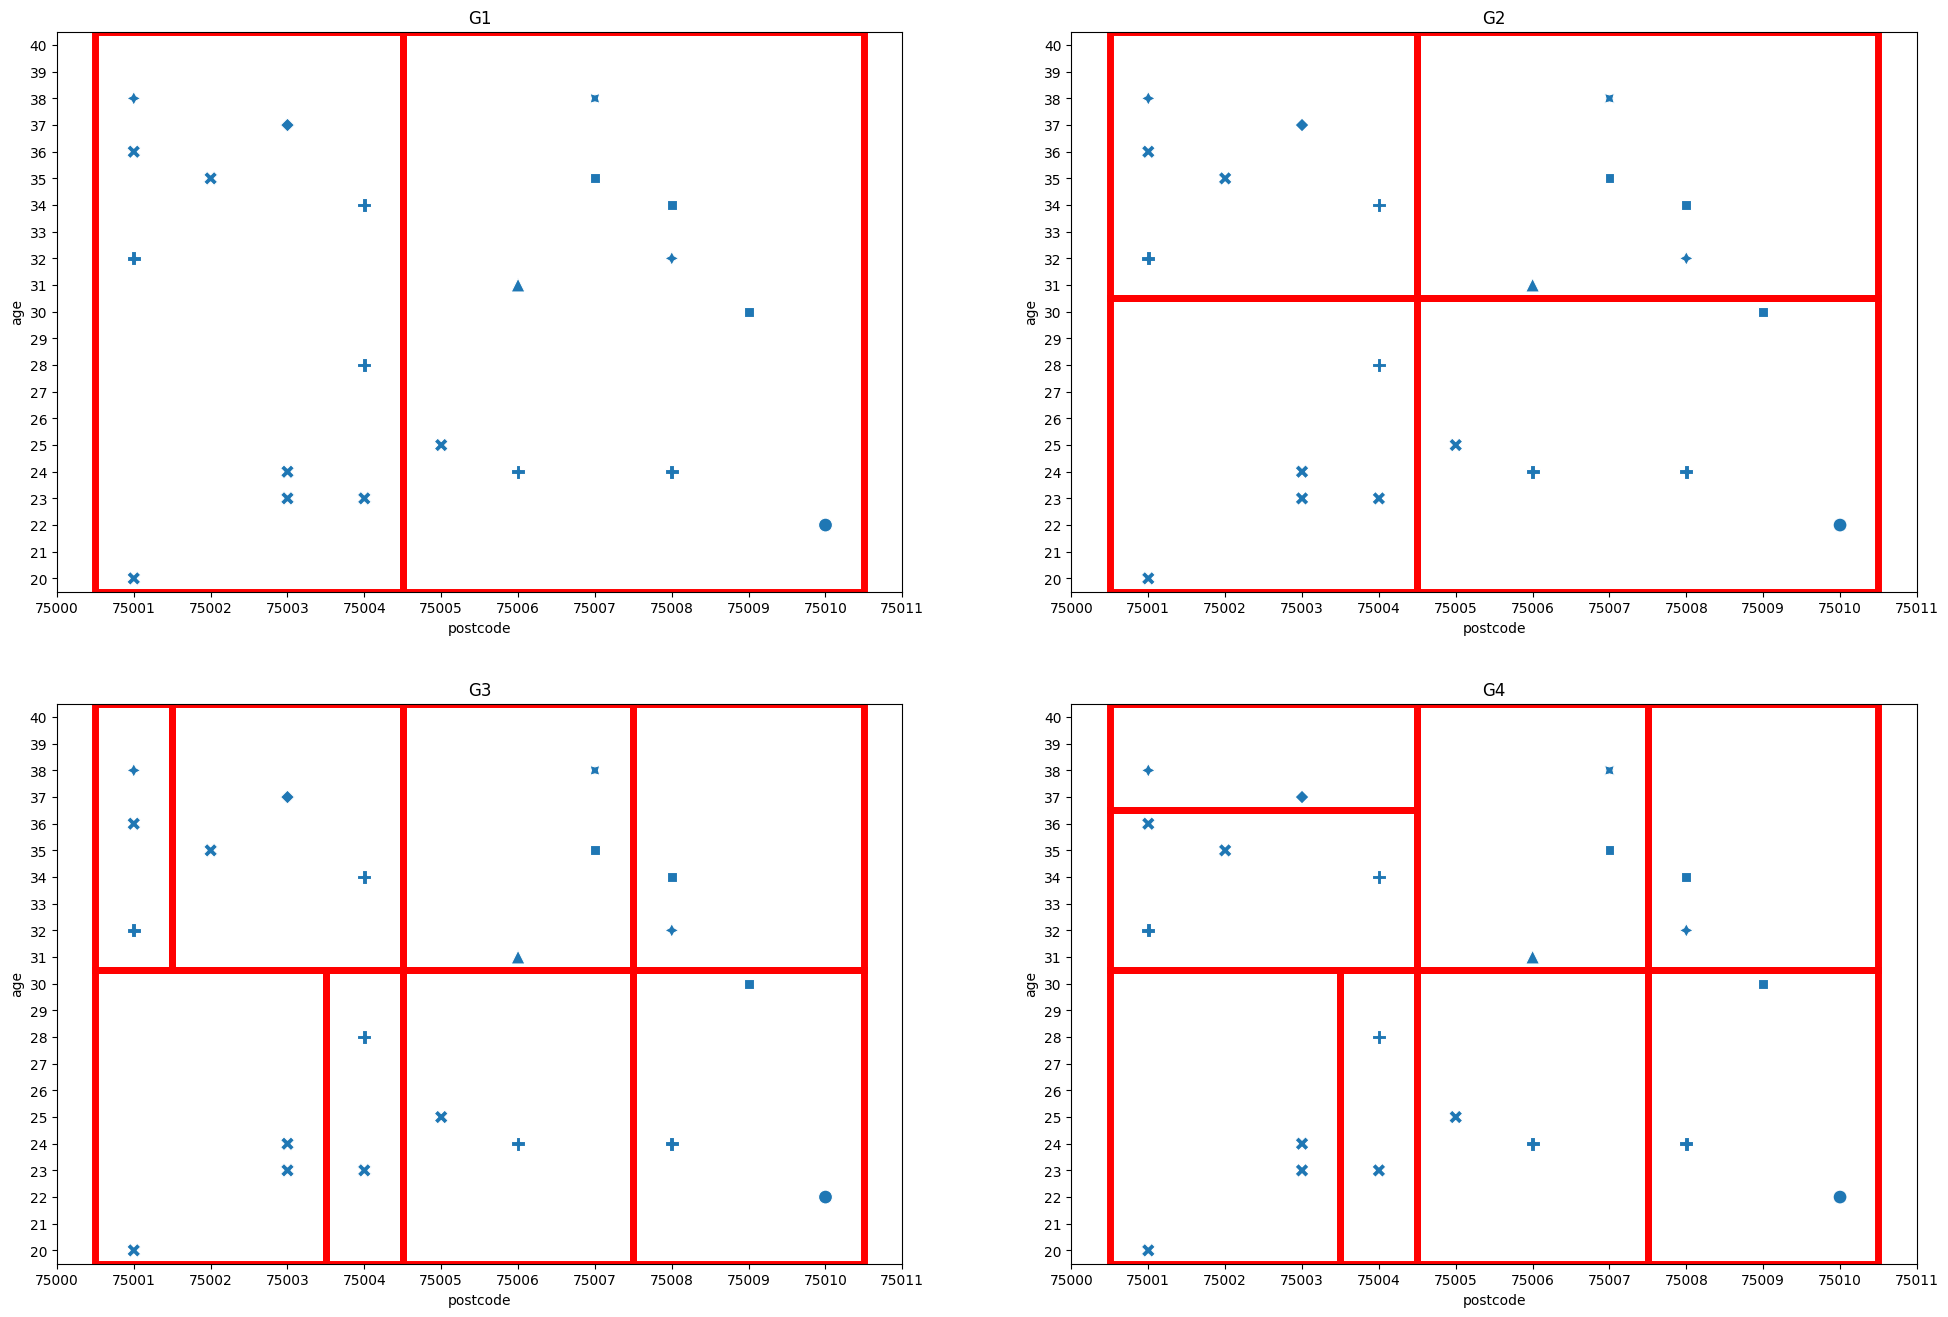

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(2*12,2*8))

for i, (g, ax) in enumerate(zip([g1, g2, g3, g4], axes.flat)):
    ax.set_title(f'G{i+1}')
    
    ax.set_ylim(19.5, 40.5)

    sns.scatterplot(x='postcode', y='age', data=d, marker='X', s=100, ax=ax, style='diagnostic')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

    for ec in g[qi].drop_duplicates().itertuples():
        x, y = ec.postcode.left, ec.age.left
        w = ec.postcode.right - ec.postcode.left
        h = ec.age.right - ec.age.left
        r = Rectangle((x - 0.5, y - 0.5), w + 1, h + 1, 
                      linewidth=5, edgecolor='red', facecolor='none')

        ax.add_patch(r)
        ax.legend([],[], frameon=False)

<h4>3. Observe: For the top left class of $G_3$, what is the set of sensitive data?</h4>

In [6]:
# The top left classs of G3 means the people whose age are between 31 to 40 and the postcode are 75001.
# Which represents that their sensitive data are Grippe, Rhinopharyngite and Angine.  

# df_g3 = pd.DataFrame(g3) 
# g3_top_left = df_g3[df_g3.age == '[31, 40]'] # & postcode == [75001, 75001]

<h4>4. Observe: Which release satisfy k-Anonymity with : k=3? k=5? k=8?</h4>

In [7]:
# The release 1 satisfy k-Anonymity with k=3, k=5 and k=8. As we could find in the photo,
# each equivalence classe contains al least 11 individuals. 

<h4>5. In general, is an 8-Anonymous release also 5-Anonymous?</h4>

In [8]:
# Yes. Becasue in an 8-Anonymous release, each class contains at least 8 individuals, so it contains more than 5 individuals.

<h4>6. Does $G_3$ satisfy naive l-Diversity with $l=3$?</h4>

In [9]:
# Non. Becasue there are even some classes that have less than 3 records,
# While the 3-Diversity requires that there must be al least l=3 distinct values of the sensitive attributes. 

<h4>7. Bob is a patient of Brascassés. His tuple appears in the initial dataset and is equal to `(75003, 37, Oblomovisme)`. Give Bob’s possible diagnostics for an attacker receiving $G_3$ and having the following background knowledge.</h4>

1. Nothing;
2. That Bob participates to the initial dataset;
3. Idem 7.2 and that his QI is `(75003, 37)`;
4. Idem 7.3 and that Bob does not have Grippe;
5. Idem 7.3 and that Alice and Charlie (1) have participated to the dataset, (2) have QIs respectively equal to `(75002, 35)` and `(75004, 34)`, and (3) have SDs respectively equal to Grippe and Rhinopharyngite.

In [10]:
# 1. We have no idea about Bob's possible diagnostics, as there is nothing information about Bob was disclosed.
# 2. Couldn't too. The same reason as the previous question.
# 3. Grippe, Oblomovisme or Rhinopharyngite. As in the classe ([75002,75004],[31,40]), there are 3 possible diagnostics.
# 4. Oblomovisme or Rhinopharyngite. As we have more information that Bob does not have Grippe.
# 5. Oblomovisme. Because we know that Alice and Charlie belongs to the same equivalence classe with Bob, and they have Grippe and Rhinopharyngite.

<h4>8. Assuming that releases $G_3$ and $G_4$ are both published. Which privacy criteria does each one satisfy independently from the other ? What are the guarantees after observing the two together ? (You can focus on the top left classes only.)</h4>

In [11]:
# Both of them only satisfy the 2-Anonymous creteria and do not satisfy l-diversity. 
# Becasue when we consider the classe of ([75001,75003],[20,30]), all of them have the Grippe, so we have no diversity here.

# The top left classe in G3 have Grippe, Rhinopharyngite and Angine, while the top left classe in G4 have Grippe and Oblomovisme as their SDs.
# When we observe them together, we could find that if one person is older than 37 and his postcode is 75001 then he must have Grippe.

<h4>9. Design and implement an attack (1) that inputs two $k$-Anonymous releases G$_i$ and G$_j$ and the quasi-identifier $q$ of a target together with the identifier of the release(s) to which her data has contributed, and (2) that, given the two releases, outputs the number of quasi-identifiers indistinguishable from the target's quasi-identifier and the corresponding set of sensitive data.</h4>

Here we would like to take the Adult dataset that we have used in TP2 as an example to design and implement our K-Anonymous release. This dataset contains 15 columns, with 14 attributes and 1 target variable.

<h5 >A. Data Preparing</h5>

In [12]:
# Import the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Attribute lables
attributeLabels =["age", "workclass","fnlwgt","education","education_num","marital_status","occupation","relationship", 
                  "race", "gender","capital_gain","capital_loss","hours_per_week","native_country","income"] 

censusData_Set=pd.read_csv(url,names=attributeLabels)
 
# For missing values, we replace the " ?" part with np.NaN
censusData_Set = censusData_Set.replace(" ?", np.NaN)
 
# The attribute lables of string data
attributeLabels_str=["workclass","education", "marital_status","occupation",
                     "relationship","race","gender","native_country","income"]  
# Remove space before data values
for label in attributeLabels_str:
    censusData_Set[label] = censusData_Set[label].str.strip()
    
censusData_Set.dropna(inplace=True)

# Reset data index
censusData_Set.reset_index(drop=True, inplace=True)

<h5 >B. Set the quasi-identifier</h5>

In [13]:
# Set the quasi-identifierlist
quasi_identifier_list=[]
quasi_identifier_DGH_list=[]
quasi_identifier_VGH_list=[]
quasi_identifier_height_list=[]

Here we would like to take 'marital_status' and 'race' as our quasi-identifiers. Of course we could add other attributes as our quasi-identifiers, all we need to do is to code them in a similar format. But pay attention that we need to segment the numeric attributes before we use it. 

In [14]:
# Look through all the values of marital-status 
censusData_Set['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

Here we would like to introduce the concept of generalized tree that would help us to segment the dataset. The generalized tree stocks in an array through the parrent-node representation method, so that we could quickly find the parent-node of all the nodes, which is more convinient for us to manage the segmentation. And in the meantime, we add a lable 'height' to represent the height of the current node in the generalized tree.

In [15]:
# The attribute lables of marital-status
marital_attributeLabels=['***','Married-h2','Alone','Married-h1','Single','Widowhood','Married-civ-spouse',         
                         'Married-AF-spouse','Separated','Divorced','Never-married','Widowed','Married-spouse-absent']
# In order to distinguish all the lables, here we add 'hx' in some of them as the suffix, while the x is the height. 

# The generalized tree of marital-status
vgh_marital=pd.DataFrame({'value': marital_attributeLabels,
                          'parent':[-1,0,0,1,2,2,3,3,3,4,4,5,5],
                          'height':[3,2,2,1,1,1,0,0,0,0,0,0,0]})
 
quasi_identifier_list.append(attributeLabels[5])        # Take marital-status as the quasi-identifier
quasi_identifier_DGH_list.append(3)
quasi_identifier_VGH_list.append(vgh_marital)
quasi_identifier_height_list.append(0)
 
print(vgh_marital)

                    value  parent  height
0   ***                   -1       3     
1   Married-h2             0       2     
2   Alone                  0       2     
3   Married-h1             1       1     
4   Single                 2       1     
5   Widowhood              2       1     
6   Married-civ-spouse     3       0     
7   Married-AF-spouse      3       0     
8   Separated              3       0     
9   Divorced               4       0     
10  Never-married          4       0     
11  Widowed                5       0     
12  Married-spouse-absent  5       0     


In [16]:
# The same process to 'race' attributes
censusData_Set['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [17]:
# The attribute lables of race
race_attributeLabels =[ '***','White-h1','Non-White','White','Asian-Pac-Islander', 
                        'Amer-Indian-Eskimo','Other','Black']

# The generalized tree of race
vgh_race=pd.DataFrame({'value': race_attributeLabels,
                       'parent':[-1,0,0,1,2,2,2,2],
                       'height':[2,1,1,0,0,0,0,0]})
 
quasi_identifier_list.append(attributeLabels[8])        # Set race as quasi-identifier
quasi_identifier_DGH_list.append(2)
quasi_identifier_VGH_list.append(vgh_race)
quasi_identifier_height_list.append(0)
 
print (vgh_race)

                value  parent  height
0  ***                -1       2     
1  White-h1            0       1     
2  Non-White           0       1     
3  White               1       0     
4  Asian-Pac-Islander  2       0     
5  Amer-Indian-Eskimo  2       0     
6  Other               2       0     
7  Black               2       0     


In [18]:
# Generalized the attr(string) of Dataframe
# Take vgh（dataframe）as the generalized tree
def Generalization_attr(tempDataSet, attr, vgh, h):
    for index,row in vgh.iterrows():
        if row.height==h:
            tempDataSet.replace({attr:row.value},vgh.loc[row.parent].value,inplace=True)

<h5 >C. K-Anonymity</h5>

We would like to stock all the combinations of occuring quasi-identifiers in the dictionary and count them. If the smallest number of items in the fianl directory is greater than or equal to k, we could say that it satisfy the k-anonymity.

In [19]:
# Define two function to check if the method satisfy the k-anonymity
 
# Stock all the combinations of quasi-identifiers into the dictionary, and return the number of occurences
def group_data(testedSet):
    quasiDict = {}
    for item in testedSet.itertuples():
        
        # Convert the quasi-identifier to string 
        item_statement=''
        for label in quasi_identifier_list:
            item_statement=item_statement+getattr(item,label)+' '
        
        # If this quasi-identifier combinations has already occured, then count + 1
        if item_statement in quasiDict.keys():
            quasiDict[item_statement] += 1
        # If this quasi-identifier didn't occur before, then create new records
        else:
            quasiDict[item_statement]=1
    # Return the dictionary
    return quasiDict
 
    
# Determine whether the dataset satisfy k-anonymity, if yes returns True, otherwise returns Flase
def if_k(testedSet,k):
    # Group the dataset and get the group number
    ans_dict=group_data(testedSet)
    
    # Present all the quasi-identifier combinations
    print('')
    print (ans_dict)
    print('')
    
    min_k=None
    # Traversing groupped dictionaries, take the minimum number of repititions, and assign it to min_k
    for i in ans_dict:
        if min_k is None or ans_dict[i]<min_k :
            min_k=ans_dict[i];
    # If min_k is bigger than or equal the given value of k, then it satisfies the k-Anonymity
    if min_k>=k:
        return True
    else:
        return False

<h5 >D. The main function</h5>

In [20]:
# Release Gi, We take k=15 for example
k_Anonymity=15
 
# Count the generaliaztion number, and initialize the sum of all quasi-identifier number
gen_count=0
for index in range(len(quasi_identifier_DGH_list)):
    gen_count+=quasi_identifier_DGH_list[index]
 
 
while if_k(censusData_Set,k_Anonymity) is False:
    for index in range(len(quasi_identifier_list)):
        # If the generalization has arrived the top
        if quasi_identifier_height_list[index]>=quasi_identifier_DGH_list[index]:
            continue
        
        # Generalization
        Generalization_attr(censusData_Set,
                            quasi_identifier_list[index],
                            quasi_identifier_VGH_list[index],
                            quasi_identifier_height_list[index])
        
        # Number of generalization - 1
        gen_count-=1
        # Hgight of generalization + 1
        quasi_identifier_height_list[index]+=1
        if if_k(censusData_Set,k_Anonymity):
            break
    print ('The height of current generalization：')
    for index in range(len(quasi_identifier_list)):
        print(quasi_identifier_list[index]+':'+str(quasi_identifier_height_list[index]))
    # Until the end of generalization
    if gen_count==0:
        print('Generalization failed')
        break
        
print ('The height of current generalization：')
for index in range(len(quasi_identifier_list)):
    print(quasi_identifier_list[index]+':'+str(quasi_identifier_height_list[index]))

print('The current k：')
print(k_Anonymity)
print ('The precision：')
prec=0
for index in range(len(quasi_identifier_list)):
    prec+=(quasi_identifier_height_list[index])/(quasi_identifier_DGH_list[index])
prec=1-(prec/len(quasi_identifier_list))
 
print (prec)


{'Never-married White ': 8036, 'Married-civ-spouse White ': 12656, 'Divorced White ': 3618, 'Married-civ-spouse Black ': 766, 'Married-spouse-absent Black ': 54, 'Married-civ-spouse Asian-Pac-Islander ': 442, 'Never-married Black ': 1197, 'Married-civ-spouse Amer-Indian-Eskimo ': 109, 'Separated Black ': 240, 'Married-AF-spouse White ': 20, 'Separated White ': 658, 'Married-civ-spouse Other ': 92, 'Divorced Black ': 452, 'Widowed White ': 684, 'Never-married Asian-Pac-Islander ': 314, 'Divorced Asian-Pac-Islander ': 67, 'Married-spouse-absent White ': 261, 'Never-married Amer-Indian-Eskimo ': 95, 'Divorced Other ': 23, 'Widowed Black ': 107, 'Widowed Other ': 5, 'Never-married Other ': 84, 'Divorced Amer-Indian-Eskimo ': 54, 'Married-spouse-absent Asian-Pac-Islander ': 33, 'Widowed Asian-Pac-Islander ': 21, 'Separated Asian-Pac-Islander ': 18, 'Married-spouse-absent Amer-Indian-Eskimo ': 8, 'Married-spouse-absent Other ': 14, 'Widowed Amer-Indian-Eskimo ': 10, 'Separated Other ': 13, 

As we could find that, in release Gi the dataset has divided into 15 groups, while the min-k is 18, which means that this grouping satisfies the 15-Anonymity principle, with 0.8334 precison. And the height of martial_status is 1. So below we take k=20 in release Gj to see the generalization outcomes.

In [21]:
# Release Gj, We take k=20 for example
k_Anonymity=20
 
# Count the generaliaztion number, and initialize the sum of all quasi-identifier number
gen_count=0
for index in range(len(quasi_identifier_DGH_list)):
    gen_count+=quasi_identifier_DGH_list[index]
 
 
while if_k(censusData_Set,k_Anonymity) is False:
    for index in range(len(quasi_identifier_list)):
        # If the generalization has arrived the top
        if quasi_identifier_height_list[index]>=quasi_identifier_DGH_list[index]:
            continue
        
        # Generalization
        Generalization_attr(censusData_Set,
                            quasi_identifier_list[index],
                            quasi_identifier_VGH_list[index],
                            quasi_identifier_height_list[index])
        
        # Number of generalization - 1
        gen_count-=1
        # Hgight of generalization + 1
        quasi_identifier_height_list[index]+=1
        if if_k(censusData_Set,k_Anonymity):
            break
    print ('The height of current generalization：')
    for index in range(len(quasi_identifier_list)):
        print(quasi_identifier_list[index]+':'+str(quasi_identifier_height_list[index]))
    # Until the end of generalization
    if gen_count==0:
        print('Generalization failed')
        break
        
print ('The height of current generalization：')
for index in range(len(quasi_identifier_list)):
    print(quasi_identifier_list[index]+':'+str(quasi_identifier_height_list[index]))

print('The current k：')
print(k_Anonymity)
print ('The precision：')
prec=0
for index in range(len(quasi_identifier_list)):
    prec+=(quasi_identifier_height_list[index])/(quasi_identifier_DGH_list[index])
prec=1-(prec/len(quasi_identifier_list))
 
print (prec)


{'Single White ': 11654, 'Married-h1 White ': 13334, 'Married-h1 Black ': 1007, 'Widowhood Black ': 161, 'Married-h1 Asian-Pac-Islander ': 460, 'Single Black ': 1649, 'Married-h1 Amer-Indian-Eskimo ': 119, 'Married-h1 Other ': 105, 'Widowhood White ': 945, 'Single Asian-Pac-Islander ': 381, 'Single Amer-Indian-Eskimo ': 149, 'Single Other ': 107, 'Widowhood Other ': 19, 'Widowhood Asian-Pac-Islander ': 54, 'Widowhood Amer-Indian-Eskimo ': 18}


{'Alone White ': 12599, 'Married-h2 White ': 13334, 'Married-h2 Black ': 1007, 'Alone Black ': 1810, 'Married-h2 Asian-Pac-Islander ': 460, 'Married-h2 Amer-Indian-Eskimo ': 119, 'Married-h2 Other ': 105, 'Alone Asian-Pac-Islander ': 435, 'Alone Amer-Indian-Eskimo ': 167, 'Alone Other ': 126}

The height of current generalization：
marital_status:2
race:0

{'Alone White ': 12599, 'Married-h2 White ': 13334, 'Married-h2 Black ': 1007, 'Alone Black ': 1810, 'Married-h2 Asian-Pac-Islander ': 460, 'Married-h2 Amer-Indian-Eskimo ': 119, 'Married-h2 O

While we take k=20 as our requirements, the dataset has dividded into 10 groups, while the precision declines to 0.6667 and the martial_status height goes depper into 2. Which means the release Gi will be better than release Gj. Further more, we could take smaller k to moniter model performance.

<h4>10. (Bonus) Observing several releases of the same dataset occurs when several updates are published (insertions, deletions, updates). Imagine a privacy criteria that supports the publishing of a dataset that evolves over time.

In [22]:
# TODO

<h4>11. (Bonus) Implement the Mondrian algorithm and compare its outputs with the releases $G_i$</h4>

In [23]:
# TODO
class mondrian:
    '''
    K-Anonymity Mondrian algorithm implementation
    '''

    def __init__(self, path, k, attributes, QI, S):
        '''Initialize：data file path、k、attributes、QI、S'''
        self.data = loaddata(
            path, attributes)       # Transfrom the data to dataframe, and load them according to their attributes
        self.data = self.data[QI+S]  
        self.path = path
        self.k = k
        self.QI = QI
        self.S = S
        self.attributes = attributes
        # Initialize the maximum priority queue with (data,key) pair  
        self.Queue = MyPriorityQueue(bigger)
        self.Queue.enqueue(self.data.count()[S[0]], self.data)
        # Transfrom label type to numerrical type
        self.categorical2numerical = {}
        self.build_categorical2numerical()
        
    def bigger(a,b):
        return a>b

    def build_categorical2numerical(self):
        '''Data preprocessing: converting lable type to numerical type '''
        for qi in self.QI:
            print(self.data[qi].dtypes)
            if self.data[qi].dtypes == object:
                # If they are lable type, then we map their label into int
                vals = np.array(self.data[qi].drop_duplicates())
                rename = {}
                i = 0
                while i < len(vals):
                    rename[vals[i]] = i
                    i = i + 1
                self.data[qi] = self.data[qi].map(rename)
                self.categorical2numerical[qi] = rename

    def search(self):
        '''Understand the loading data, take each item in the priority queue as a QI cluster'''
        start = time.time()                                         # Start time
        print('=>begin searching: k={0}'.format(self.k))            # Slicing process
        print(self.data)
        while True:
            # Take the larget numebr of QI
            data = self.Queue.dequeue()
            data_new = data[1]
            a = random.randint(0,len(self.QI)-1)
            qi = self.QI[a]
            # Cut dataset in half with random QI(baseed on the median, so uneven) 
            data_new = pd.qcut(data_new[qi], q=2, labels=False, duplicates='drop')
            # print('before cut:\n{0}'.format(data_new))
            data1 = data[1][data_new == 0]
            num1 = data1.count()[self.S[0]]
            data2 = data[1][data_new == 1]
            num2 = data2.count()[self.S[0]]
            #print('after cut:')
            if(num1>=self.k and num2>=self.k):
                # If all the conditons are satisfied, then we add them into the priority list
                self.Queue.enqueue(num1, data1)
                self.Queue.enqueue(num2, data2)
                #print('{0},{1},'.format(num1, num2))
                #print(data1)
                #print(data2)
                continue
            elif data[0] >= 2*self.k:
                # One condition couldn't be satisfied, but satisfy the the needs of number
                data_new = data[1].sort_values(by=self.QI)
                cut_num = math.floor(data[0]/2)
                data1 = data_new[0:cut_num]
                #print('data1:\n{0}'.format(data1))
                data2 = data_new[cut_num:data[0]]
                if(cut_num>=self.k and data[0]-cut_num>=self.k):
                    self.Queue.enqueue(cut_num, data1)
                    self.Queue.enqueue(data[0]-cut_num, data2)
                #print('{0},{1},{2},{3}'.format(data[1].count()[self.S[0]], data[0], cut_num, data[0]-cut_num))
            else:
                # No further cuts, the process complete 
                self.Queue.enqueue(data[0], data[1])
                break

        # Print the measuring time
        end = time.time()   # End time
        print('=>end searching, total search time is:{0}(s)\n'.format(end-start))

        # All the partipation have completed, we publish the data
        self.pub_data()


    def pub_data(self):
        ''' Generalization the data based on the QI cluster, publish as the .data file.'''
        start = time.time()                     # Start time
        LossMetric = 0
        max_QI = self.data[self.QI].max()       # Max of the whole data
        min_QI = self.data[self.QI].min()       # Min of the whole data
        range_QI = max_QI - min_QI              # Range of the whole data
        print('=>begin publishing:')

        while self.Queue.is_empty() == False:
            # For all QI cluster in the queue
            data = self.Queue.dequeue()
            max_qi = data[1][self.QI].max()     # Max of this QI cluster
            min_qi = data[1][self.QI].min()     # Min of this QI cluster
            range_qi = max_qi - min_qi          # Range of this QI cluster
            for qi in self.QI:
                # The attributes of each QI
                LossMetric = LossMetric + data[0] * range_qi[qi] / range_QI[qi]     # Calculate LM
                self.data[qi].loc[data[1].index] = '[' + str(min_qi[qi]) + ',' + str(max_qi[qi]) + ']'   # Generalization
        LossMetric = LossMetric / self.data.count()[self.S[0]]

        print('===>after generalization:')
        print(self.data)
        # Publish
        # Split the data file path, get firstname without file suffix
        namesplit = os.path.splitext(self.path)
        firstname = namesplit[len(namesplit) - 2]
        out_path = firstname + '_mondrian.data'
        self.data.to_csv(out_path, index=False, header=False)
        print('===>publish file path:{0}'.format(out_path))
        print('===>k={0}'.format(self.k))

        # Publish the yaml file, convert the label type to numerical type
        out_path_yaml = firstname + '_mondrian.yaml'
        fp = open(out_path_yaml, 'w')
        fp.write(yaml.dump(self.categorical2numerical))
        print(yaml.dump(self.categorical2numerical))
        fp.close()

        end = time.time()   # End time
        print('=>end publishing, total lossmetric is:{0}, total publishing time is:{1}'.format(LossMetric, end-start))
        return out_path